In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-estate-data-sourced-from-99acres-com/houses.csv
/kaggle/input/real-estate-data-sourced-from-99acres-com/flats.csv


# **REAL ESTATE INSIGHTS**

<img src = "https://www.bworldonline.com/wp-content/uploads/2023/08/SF_Real-estate-deals-between-agent-and-client-shaking-hands-OL.jpg">

## **The following topics are covered in this project:**

* Description of Dataset
* Objective
* Data Importing and Understanding
* Data Preprocessing
* Exploratory Analysis and Visualization
* Asking and answering interesting questions
* Summarizing inferences and drawing conclusions

# **Description of Dataset**

* **property_name**: Name or description of the flat.
* **society**: The housing society or complex name.
* **price**: The listed price of the flat.
* **rate**: Rate of the flat (possibly per unit area).
* **areaWithType**: The area of the flat with type.
* **bedroom, bathroom, balcony**: The number of bedrooms, bathrooms, and balconies.
* **additionalRoom**: Information about additional rooms.
* **address**: The address of the flat.
* **floorNum**: The floor number on which the flat is located.
* **facing**: The direction the flat faces.
* **agePossession**: Age of the flat or possession details.
* **nearbyLocations**: Nearby locations or landmarks.
* **description**: A description of the flat.
* **furnishDetails**: Details about furnishings.
* **features**: Features of the flat.
* **rating**: Ratings given to the flat.
* **property_id**: A unique identifier for the flat.


# **Objective**

* **What is the problem?**

  Understanding and analyzing various aspects of the real estate market, particularly in the context of   flats, includes pricing, location preferences, and property features.

* **Why is it important to solve it?**
  
  This analysis can provide insights into market trends, consumer preferences, and investment             opportunities in the real estate sector. It is also crucial for developing data analysis skills in       practical, real-world contexts.


# **Data Importing and Understanding**

In [2]:
df = pd.read_csv("/kaggle/input/real-estate-data-sourced-from-99acres-com/flats.csv")
df

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,3 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ansal Heights 86,1.05 Crore,"₹ 5,541/sq.ft.",Super Built up area 1895(176.05 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Servant Room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",9th of 13 Floors,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124
3013,5 BHK Flat in Sector 48 Gurgaon,https://www.99acres.com/5-bhk-bedroom-apartmen...,Parsvnath Green Ville3.9 ★,3.3 Crore,"₹ 9,984/sq.ft.",Super Built up area 3905(362.79 sq.m.)Built Up...,5 Bedrooms,5 Bathrooms,3+ Balconies,Servant Room,"Sector 48 Gurgaon, Gurgaon, Haryana",4th of 5 Floors,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294
3014,3 BHK Flat in Sector 108 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Raheja Vedaanta3.6 ★,95 Lac,"₹ 5,214/sq.ft.",Super Built up area 1822(169.27 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Others,"Sector 108 Gurgaon, Gurgaon, Haryana",3rd o

In [3]:
df.head()

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"Krishna Colony, Gurgaon, Haryana",4th of 4 Floors,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,"46b, Ashok Vihar, Gurgaon, Haryana",1st of 3 Floors,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,"Sohna, Gurgaon, Haryana",12nd of 14 Floors,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,"Sector 61 Gurgaon, Gurgaon, Haryana",2nd of 4 Floors,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,"Sector 92 Gurgaon, Gurgaon, Haryana",5th of 8 Floors,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793


In [4]:
df.tail()

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
3012,3 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ansal Heights 86,1.05 Crore,"₹ 5,541/sq.ft.",Super Built up area 1895(176.05 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Servant Room,"Tower C, Sector 86 Gurgaon, Gurgaon, Haryana",9th of 13 Floors,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124
3013,5 BHK Flat in Sector 48 Gurgaon,https://www.99acres.com/5-bhk-bedroom-apartmen...,Parsvnath Green Ville3.9 ★,3.3 Crore,"₹ 9,984/sq.ft.",Super Built up area 3905(362.79 sq.m.)Built Up...,5 Bedrooms,5 Bathrooms,3+ Balconies,Servant Room,"Sector 48 Gurgaon, Gurgaon, Haryana",4th of 5 Floors,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294
3014,3 BHK Flat in Sector 108 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Raheja Vedaanta3.6 ★,95 Lac,"₹ 5,214/sq.ft.",Super Built up area 1822(169.27 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Others,"Sector 108 Gurgaon, Gurgaon, Haryana",3rd of 22 Floors,NaN,1 to 5 Year Old,NaN,3 bedroom flat with full woodwork. Ready to mo...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",A41215323
3015,3 BHK Flat in DLF Phase 3,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ambience Lagoon3.9 ★,5.8 Crore,"₹ 12,500/sq.ft.",Built Up area: 3700 (343.74 sq.m.),3 Bedrooms,4 Bathrooms,3+ Balconies,"Pooja Room,Study Room,Servant Room,Others","Gurgaon, DLF Phase 3, Gurgaon, Haryana",9th of 9 Floors,North-East,10+ Year Old,"['Micromax moulsari avenue metro station', 'In...",Luxury condominium complex located on delhi gu...,"['1 Water Purifier', '10 Fan', '1 Fridge', '1 ...","['Security / Fire Alarm', 'Private Garden / Te...","['Management5 out of 5', 'Green Area5 out of 5...",J18888617
3016,4 BHK Flat in Sector 54 Gurgaon,https://www.99acres.com/4-bhk-bedroom-apartmen...,DLF The Crest3.6 ★,11 Crore,"₹ 35,222/sq.ft.",Super Built up area 3123(290.14 sq.m.),4 Bedrooms,6 Bathrooms,3 Balconies,Servant Room,"Sector 54 Gurgaon, Gurgaon, Haryana",7th of 36 Floors,NaN,1 to 5 Year Old,"['Sector 53-54 Metro Station', 'Ardee Mall', '...",Club & pool facing\nVrv air conditioning,"['6 Fan', '1 Fridge', '1 Exhaust Fan', '5 Geys...","['Security / Fire Alarm', 'Power Back-up', 'In...","['Management4 out of 5', 'Green Area4 out of 5...",V70296402


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   property_name    3017 non-null   object
 1   link             3017 non-null   object
 2   society          3016 non-null   object
 3   price            3007 non-null   object
 4   rate             3004 non-null   object
 5   areaWithType     3008 non-null   object
 6   bedRoom          3008 non-null   object
 7   bathroom         3008 non-null   object
 8   balcony          3008 non-null   object
 9   additionalRoom   1694 non-null   object
 10  address          3002 non-null   object
 11  floorNum         3006 non-null   object
 12  facing           2127 non-null   object
 13  agePossession    3007 non-null   object
 14  nearbyLocations  2913 non-null   object
 15  description      3008 non-null   object
 16  furnishDetails   2203 non-null   object
 17  features         2594 non-null   

In [6]:
df.describe()

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,address,floorNum,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id
count,3017,3017,3016,3007,3004,3008,3008,3008,3008,1694,3002,3006,2127,3007,2913,3008,2203,2594,2676,3008
unique,404,2880,638,439,2130,1932,6,7,5,49,1287,550,8,48,599,2787,1367,1438,341,2874
top,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,SS The Leaf3.8 ★,1.25 Crore,"₹ 10,000/sq.ft.",Super Built up area 1578(146.6 sq.m.),3 Bedrooms,2 Bathrooms,3 Balconies,Servant Room,"Sohna, Gurgaon, Haryana",2nd of 4 Floors,North-East,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral ...",Best in class property available at sohna loca...,[],"['Feng Shui / Vaastu Compliant', 'Security / F...","['Green Area5 out of 5', 'Construction4 out of...",I69037888
freq,126,2,73,79,19,17,1439,1047,977,630,77,74,506,1479,73,7,367,290,128,2


In [7]:
df.isnull().sum()

property_name         0
link                  0
society               1
price                10
rate                 13
areaWithType          9
bedRoom               9
bathroom              9
balcony               9
additionalRoom     1323
address              15
floorNum             11
facing              890
agePossession        10
nearbyLocations     104
description           9
furnishDetails      814
features            423
rating              341
property_id           9
dtype: int64

In [8]:
df.shape

(3017, 20)

# **Data Preprocessing**

In [9]:
# droping null values with respect in columns: bedRoom, bathroom, balcony, society, price
df.dropna(subset = ['bedRoom', 'bathroom','balcony','society','price'], inplace=True)

In [10]:
# replacing "Price on Request" with 0 to convert price column in numeric format
df.loc[df['price']=='Price on Request','price'] = 0

# splitting values of price column 
A = df.price.str.split(" ",expand = True)

# converting in numeric format
A[0] = A[0].astype(float)

# conerting crore in lacs
A.loc[A[1]=='Crore',0] = A[0]*100

# adding a new column:"price in lacs" in dataframe
df['price in lacs'] = A[0]

In [11]:
# replacing string to convert column: areWithType in numeric format
df["areaWithType"]=df["areaWithType"].str.replace("Super Built up area","Super Built up area:")

# splitting values of areaWithType column 
B = df.areaWithType.str.split(":",expand = True)

# further splittiing
C = B[1].str.split("(",expand=True)

C[0] = C[0].str.replace("Carpet area","")

# converting in numeric format
C[0] = C[0].astype("float")

# adding a new column: "total are" in dataframe
df["total area"] = C[0]

In [12]:
df

,property_name,link,society,price,rate,areaWithType,bedRoom,bathroom,balcony,additionalRoom,...,facing,agePossession,nearbyLocations,description,furnishDetails,features,rating,property_id,price in lacs,total area
0,2 BHK Flat in Krishna Colony,https://www.99acres.com/2-bhk-bedroom-apartmen...,maa bhagwati residency,45 Lac,"₹ 5,000/sq.ft.",Carpet area: 900 (83.61 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,...,West,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",So with lift.Maa bhagwati residency is one of ...,"['3 Fan', '4 Light', '1 Wardrobe', 'No AC', 'N...","['Feng Shui / Vaastu Compliant', 'Security / F...","['Environment4 out of 5', 'Safety4 out of 5', ...",C68850746,45.0,900.0
1,2 BHK Flat in Ashok Vihar,https://www.99acres.com/2-bhk-bedroom-apartmen...,Apna Enclave,50 Lac,"₹ 7,692/sq.ft.",Carpet area: 650 (60.39 sq.m.),2 Bedrooms,2 Bathrooms,1 Balcony,NaN,...,West,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', ...","Property situated on main road, railway statio...","['3 Wardrobe', '4 Fan', '1 Exhaust Fan', '1 Ge...","['Security / Fire Alarm', 'Maintenance Staff',...","['Environment4 out of 5', 'Safety4 out of 5', ...",H68850564,50.0,650.0
2,2 BHK Flat in Sohna,https://www.99acres.com/2-bhk-bedroom-apartmen...,Tulsiani Easy in Homes,40 Lac,"₹ 6,722/sq.ft.",Carpet area: 595 (55.28 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,NaN,...,NaN,0 to 1 Year Old,"['Huda City Metro', 'Golf Course extn road', '...","This property is 15 km away from badshapur, gu...",NaN,"['Power Back-up', 'Feng Shui / Vaastu Complian...","['Environment4 out of 5', 'Safety4 out of 5', ...",J68850120,40.0,595.0
3,2 BHK Flat in Sector 61 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Smart World Orchard,1.47 Crore,"₹ 12,250/sq.ft.",Carpet area: 1200 (111.48 sq.m.),2 Bedrooms,2 Bathrooms,2 Balconies,Study Room,...,NaN,Dec-23,"['Sector 55-56 Metro station', 'Bestech Centra...",Near to metro station of sector 56 and opposit...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...",NaN,S68849476,147.0,1200.0
4,2 BHK Flat in Sector 92 Gurgaon,https://www.99acres.com/2-bhk-bedroom-apartmen...,Parkwood Westend,70 Lac,"₹ 5,204/sq.ft.",Super Built up area: 1345(124.95 sq.m.),2 Bedrooms,2 Bathrooms,3 Balconies,Study Room,...,NaN,Under Construction,"['Yadav Clinic', 'Bangali Clinic', 'Dr. J. S. ...",We are the proud owners of this 2 bhk alongwit...,[],NaN,"['Environment5 out of 5', 'Safety3 out of 5', ...",L47956793,70.0,1345.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3012,3 BHK Flat in Sector 86 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Ansal Heights 86,1.05 Crore,"₹ 5,541/sq.ft.",Super Built up area: 1895(176.05 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Servant Room,...,North-East,Under Construction,"['IRIS Broadway Mall', 'Delhi Jaipur Expresswa...",Residential apartment for sell.Located in sect...,[],NaN,"['Safety4.5 out of 5', 'Lifestyle5 out of 5', ...",D26586124,105.0,1895.0
3013,5 BHK Flat in Sector 48 Gurgaon,https://www.99acres.com/5-bhk-bedroom-apartmen...,Parsvnath Green Ville3.9 ★,3.3 Crore,"₹ 9,984/sq.ft.",Super Built up area: 3905(362.79 sq.m.)Built U...,5 Bedrooms,5 Bathrooms,3+ Balconies,Servant Room,...,NaN,10+ Year Old,"['Sri Radhe Krishna Temple', 'Icici bank ATM',...",5 bhk duplex penthouse in low rise building.Av...,NaN,"['Security / Fire Alarm', 'Private Garden / Te...","['Management4 out of 5', 'Green Area4 out of 5...",J17123294,330.0,3905.0
3014,3 BHK Flat in Sector 108 Gurgaon,https://www.99acres.com/3-bhk-bedroom-apartmen...,Raheja Vedaanta3.6 ★,95 Lac,"₹ 5,214/sq.ft.",Super Built up area: 1822(169.27 sq.m.),3 Bedrooms,3 Bathrooms,3 Balconies,Others,...,NaN,1 to 5 Year Old,NaN,3 bedroom flat with full woodwork. Ready to mo...,[],"['Security / Fire Alarm', 'Feng Shui / Vaastu ...","['Management3 out of 5', 'Green Area4 out of 5...",A41215323,95.0,1822.0
3015,3 BHK Flat in DLF Phase 3,https://www.99acres.com/3-bhk-bedroom-apartmen...

In [13]:
df.facing.value_counts()

facing
North-East    506
East          491
North         302
South         203
West          183
North-West    162
South-East    144
South-West    135
Name: count, dtype: int64

In [14]:
df.bedRoom.value_counts()

bedRoom
3 Bedrooms    1439
2 Bedrooms     946
4 Bedrooms     481
1 Bedroom      105
5 Bedrooms      32
6 Bedrooms       3
Name: count, dtype: int64

In [15]:
df.bathroom.value_counts()

bathroom
2 Bathrooms    1045
3 Bathrooms     991
4 Bathrooms     638
5 Bathrooms     170
1 Bathroom      115
6 Bathrooms      42
7 Bathrooms       5
Name: count, dtype: int64

In [16]:
df.balcony.value_counts()

balcony
3 Balconies     976
3+ Balconies    863
2 Balconies     751
1 Balcony       318
No Balcony       98
Name: count, dtype: int64

### Insights
* We have removed null values in respect of columns: bedRoom, bathroom, balcony, society, price
* We have added 2 new columns in dataset named: "price in lacs" and "total area"
* We checked out all unique value in respect of columns: facing, bedRoom, bathrrom, balcony

# **Exploratory Analysis and Visualization**

In [17]:
# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# **Task**

1. How many flats are listed in each society?
2. What is the average price of 2 BHK flats?
3. Count the number of flats available in each bedroom category.
4. What is the distribution of flats based on the number of bathrooms?
5. Determine the average area of flats for each type of facing.
6. Analyze the correlation between the area of flats and their prices.
7. Create a histogram to visualize the distribution of flat prices.

### **1. How many flats are listed in each society?**

In [18]:
D = df.society.value_counts()
D

society
SS The Leaf3.8 ★                             73
Tulip Violet4.3 ★                            40
Shapoorji Pallonji Joyville Gurugram4.0 ★    39
Signature Global Park4.0 ★                   36
Shree Vardhman Victoria3.8 ★                 35
                                             ..
shree kirpalu gi sector 52                    1
Meditech Apartment                            1
Mariners Home                                 1
IMT View Society                              1
Spire Woods Now Ananda by Alpha corp          1
Name: count, Length: 635, dtype: int64

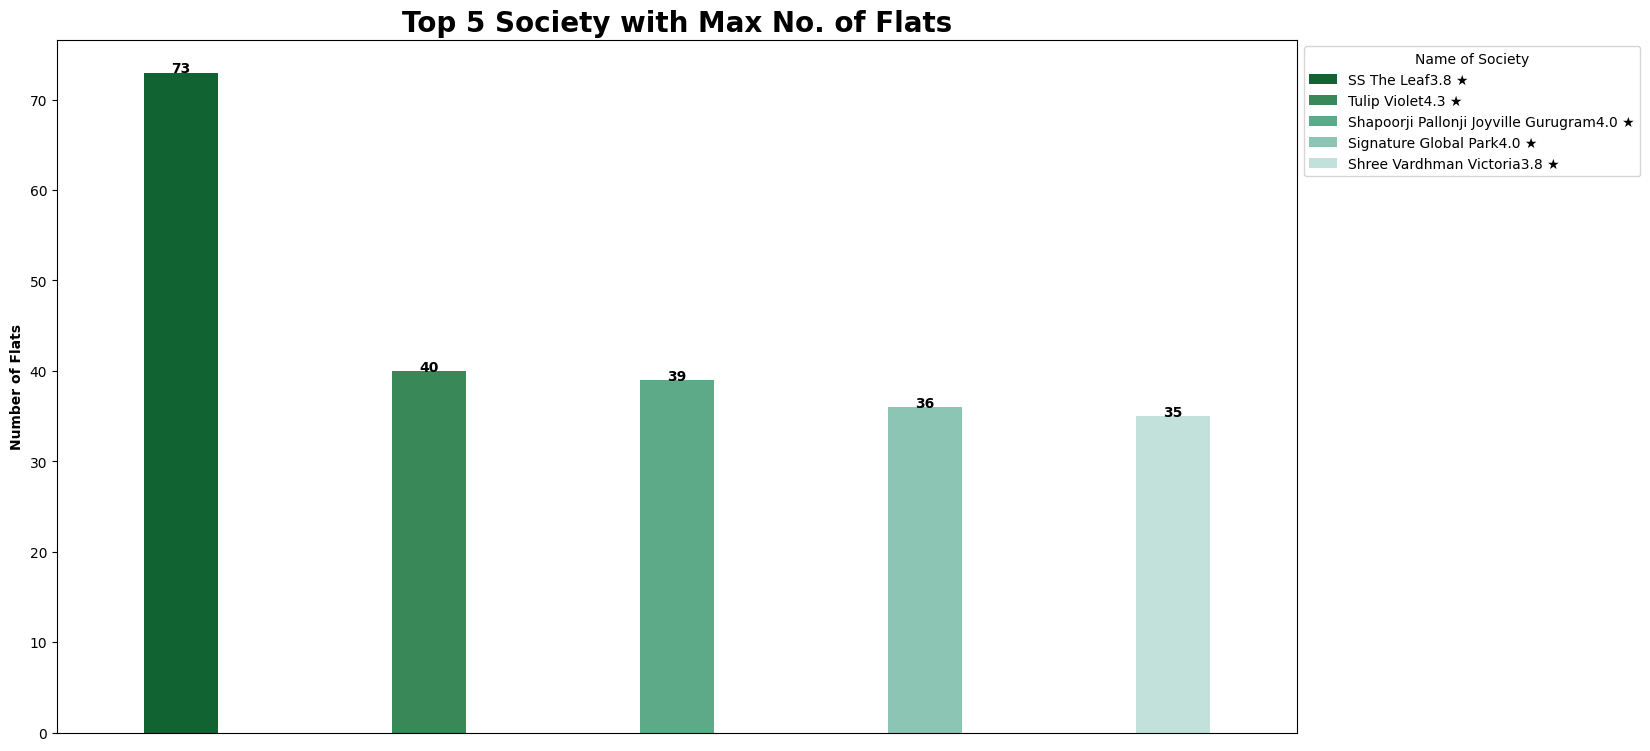

In [19]:
a = D.head().index
b = D.head().values
def addlabels(a,b):
    for i in range(len(a)):
        plt.text(i, b[i], b[i], ha = 'center',fontweight = "bold")
fig = plt.figure(figsize = (16,9))
sns.barplot(data = df, x = a, y = b, width = 0.3,hue=a,palette=sns.color_palette("BuGn_r"), 
            dodge=False).set(xlabel = None)
plt.legend(title='Name of Society',bbox_to_anchor=(1, 1), loc='upper left')
plt.title("Top 5 Society with Max No. of Flats",fontsize=20,fontweight = "bold")
plt.ylabel("Number of Flats",fontweight = "bold")
plt.xticks([])
addlabels(a,b)
plt.show()

### **2. What is the average price of 2 BHK flats?**

In [20]:
print('Average price of 2 BHK Flats is:')
df.loc[df['bedRoom']=='2 Bedrooms','price in lacs'].mean()

Average price of 2 BHK Flats is:


88.98437367303609

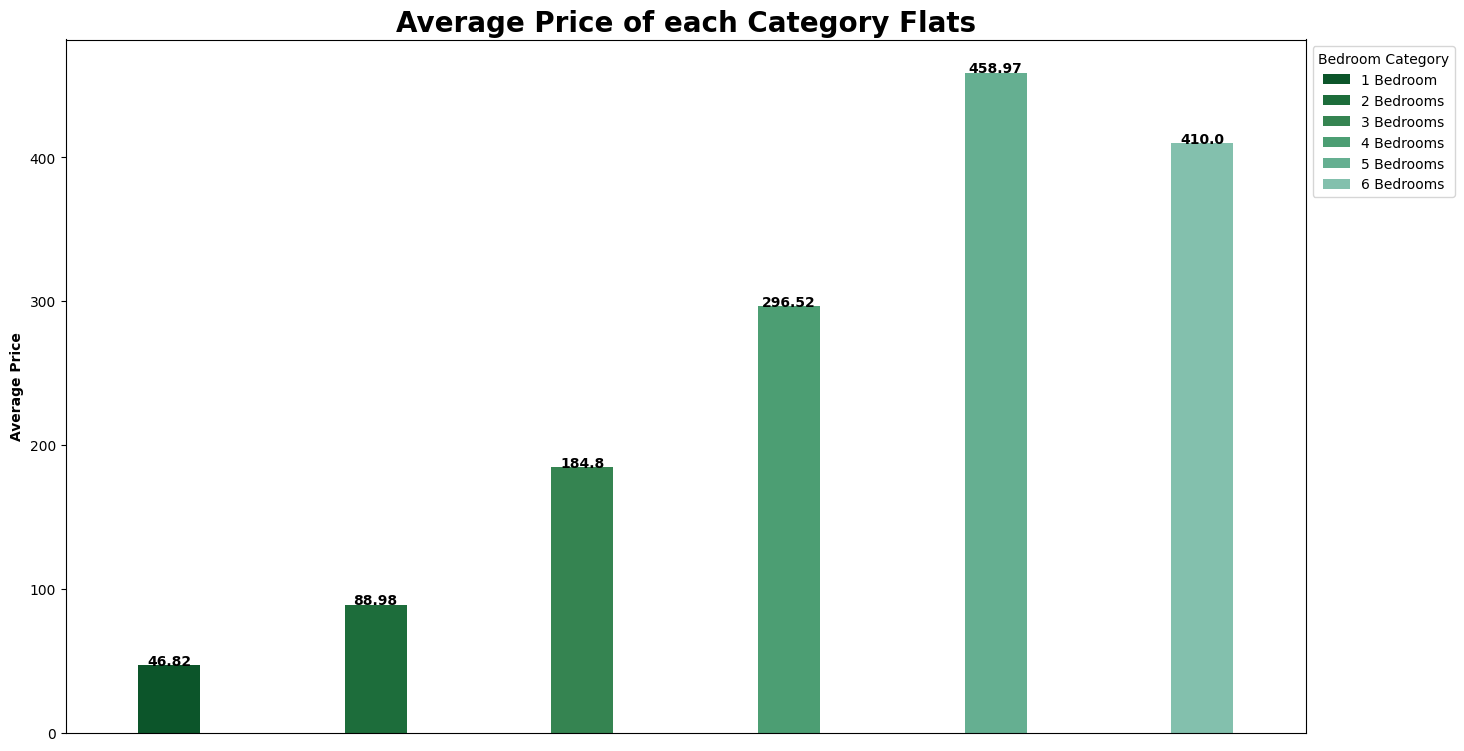

In [21]:
E = round(df.groupby('bedRoom',as_index = False)['price in lacs'].mean(),2)
a = E['bedRoom']
b = E['price in lacs']
def addlabels(a,b):
    for i in range(len(a)):
        plt.text(i, b[i], b[i], ha = 'center', fontweight = "bold")
fig = plt.figure(figsize = (16,9))
sns.barplot(data = df, x = a, y = b, width = 0.3,hue=a,palette=sns.color_palette("BuGn_r", 10), 
            dodge=False).set(xlabel=None)
plt.legend(title='Bedroom Category',bbox_to_anchor=(1, 1), loc='upper left')
plt.title("Average Price of each Category Flats",fontsize=20,fontweight = "bold")
plt.ylabel("Average Price",fontweight = "bold")
plt.xticks([])
addlabels(a,b)
plt.show()

### **3. Count the number of flats available in each bedroom category.**

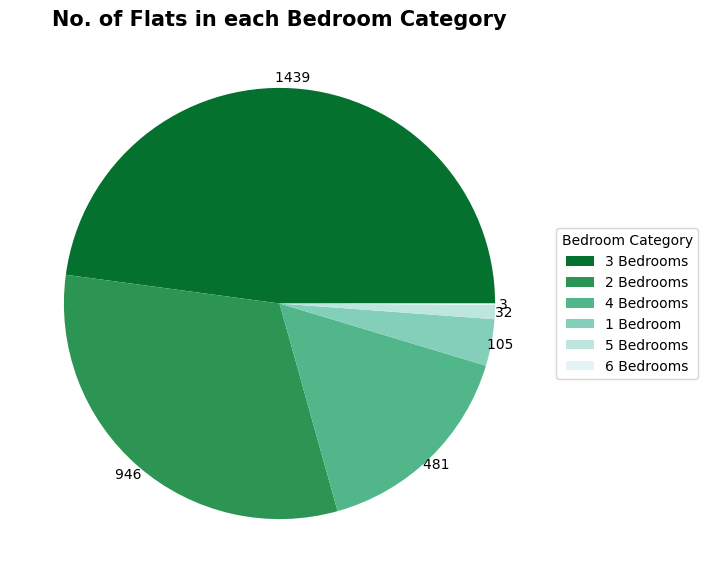

In [22]:
F = df.bedRoom.value_counts()
fig = plt.figure(figsize = (12,7))
def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{absolute:d} "
plt.pie(data=df, x= F.values,colors = sns.color_palette("BuGn_r"), 
        autopct=lambda pct: func(pct, F.values),pctdistance= 1.05)
plt.legend(labels= F.index,title='Bedroom Category', loc='center left',
           bbox_to_anchor=(1,0, 0.5, 1))
plt.title('No. of Flats in each Bedroom Category',fontsize=15,fontweight = "bold")
plt.show()

### **4. What is the distribution of flats based on the number of bathrooms?**

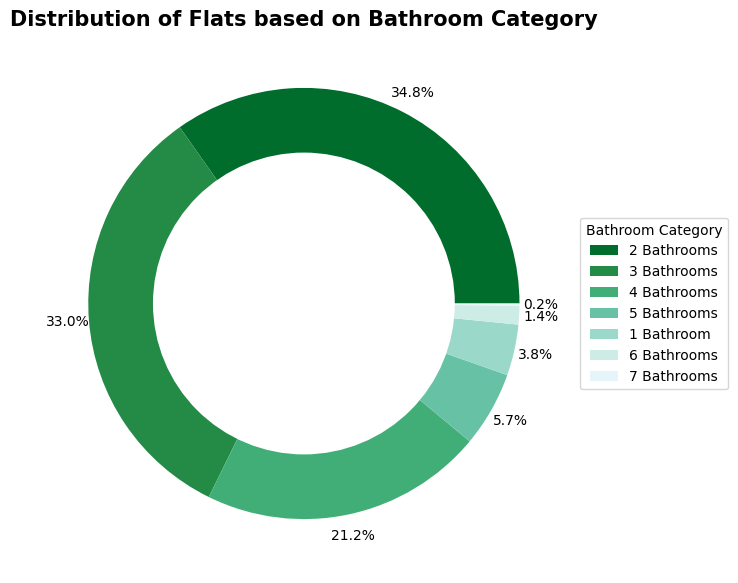

In [23]:
G = df.bathroom.value_counts()
fig = plt.figure(figsize = (12,7))
plt.pie(data=df, x= G.values,colors = sns.color_palette("BuGn_r",7), 
        autopct='%1.1f%%',pctdistance= 1.1)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.legend(labels= G.index,title='Bathroom Category', loc='center left',
           bbox_to_anchor=(1,0, 0.5, 1))
plt.title('Distribution of Flats based on Bathroom Category',fontsize=15,fontweight = "bold")
plt.show()

### **5. Determine the average area of flats for each type of facing.**

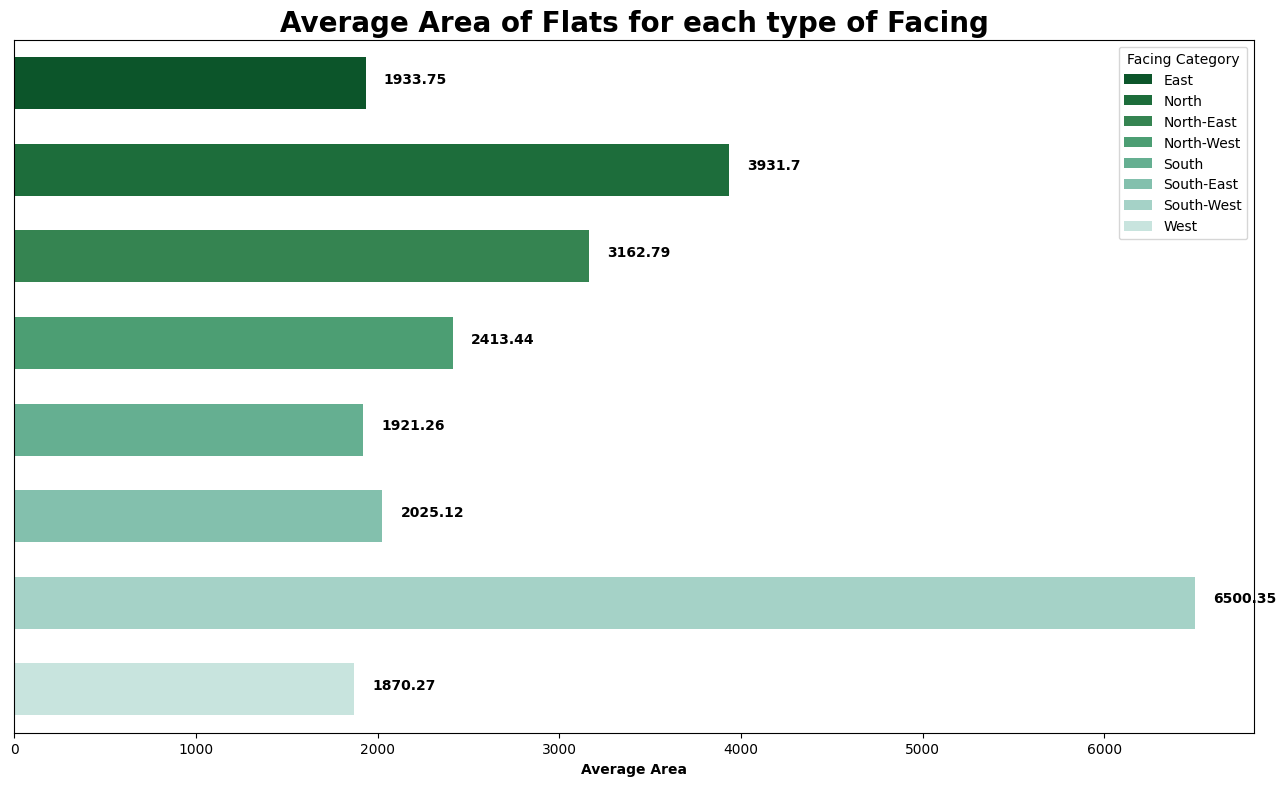

In [24]:
H = round(df.groupby('facing',as_index = False)['total area'].mean(),2)
a = H['facing']
b = H['total area']
fig = plt.figure(figsize = (16,9))
sns.barplot(data = df, x = b, y = a,orient='h', width = 0.6,hue=a,palette=sns.color_palette("BuGn_r", 10), 
            dodge=False).set(ylabel=None)
plt.legend(title='Facing Category', loc='upper right')
plt.title("Average Area of Flats for each type of Facing",fontsize=20,fontweight = "bold")
plt.xlabel("Average Area",fontweight = "bold")
plt.yticks([])
for i, v in enumerate(b):
    plt.text(v + 100, i + 0, str(v), color='black', fontweight='bold')
plt.show()

### **6. Analyze the correlation between the area of flats and their prices**

In [25]:
df['price in lacs'].corr(df['total area'])

-0.009468315741014467

No correlation found between areas and prices.
Given that the corr function returns a value of -0.00947, which is nearly 0, this shows a no relation which means that "movement in one variable cannot be predicted from the other".

### **7. Create a histogram to visualize the distribution of flat prices.**

<function matplotlib.pyplot.show(close=None, block=None)>

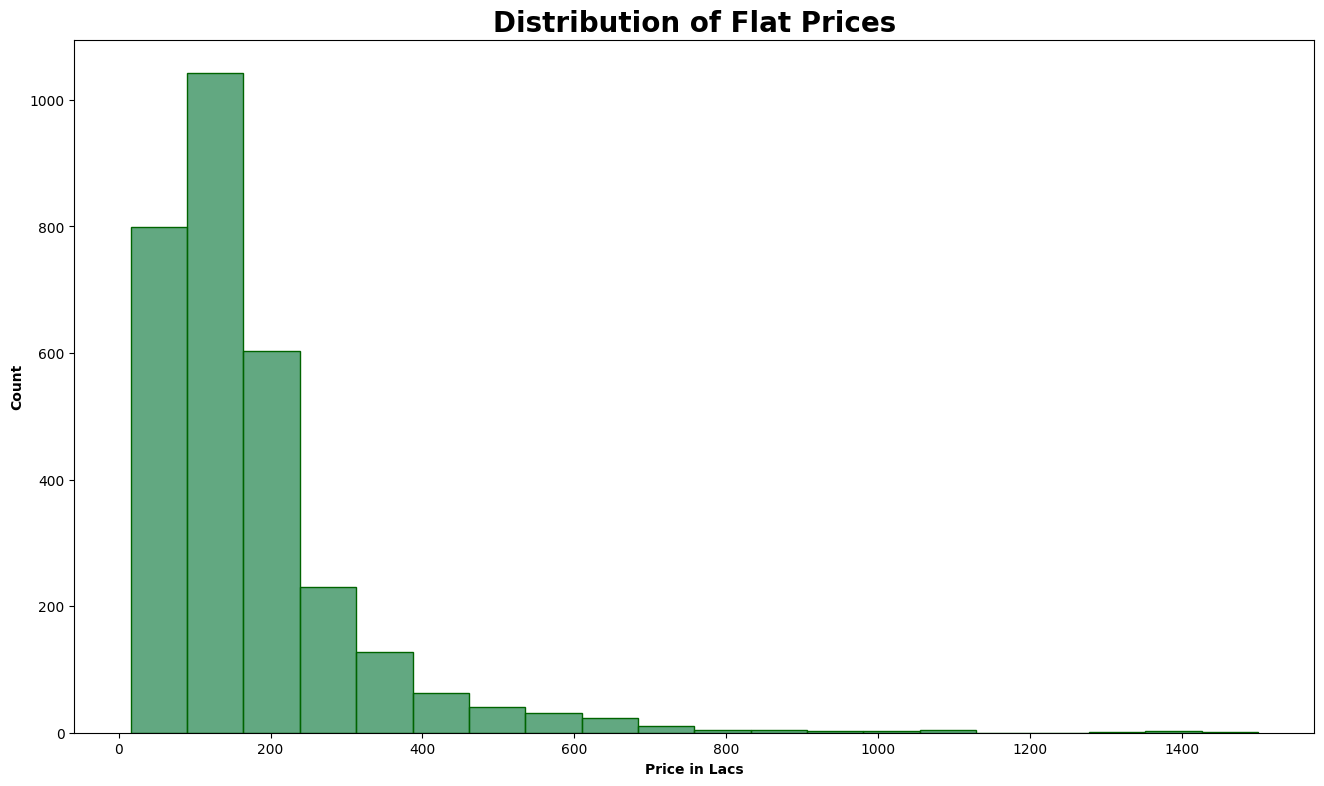

In [26]:
fig = plt.figure(figsize = (16,9))
sns.histplot(data = df, x = 'price in lacs',color = 'seagreen',bins=20,edgecolor = 'darkgreen')
plt.title('Distribution of Flat Prices',fontsize=20,fontweight = "bold")
plt.xlabel('Price in Lacs',fontweight = "bold")
plt.ylabel('Count',fontweight = "bold")
plt.show

# **Conclusion**

* Top 5 Society with max no. of flats are: 
  1. SS The Leaf3.8 ★
  2. Tulip Violet4.3 ★,                     
  3. Shapoorji Pallonji Joyville Gurugram4.0 ★
  4. Signature Global Park4.0 ★                   
  5. Shree Vardhman Victoria3.8 ★ 
* 5 BHK flats has the highest average price.
* Maximum flats are available in 3 BHK category.
* Maximum flats are available with 2 and 3 bathroom set.
* Flats facing South-West has the highest average area.

<img src = "https://t3.ftcdn.net/jpg/02/91/52/22/360_F_291522205_XkrmS421FjSGTMRdTrqFZPxDY19VxpmL.jpg">